In [1]:
import pandas as pd


data = {
    "Date": [
        "2024-01-15", "2024-01-15", "2024-02-10", "2024-02-10",
        "2024-03-12", "2024-03-12", "2024-04-05", "2024-04-05",
        "2024-05-20", "2024-05-20", "2024-06-15", "2024-06-15"
    ],
    "Product": [
        "Product A", "Product B", "Product A", "Product C",
        "Product B", "Product C", "Product A", "Product B",
        "Product C", "Product A", "Product B", "Product C"
    ],
    "Region": [
        "North", "South", "East", "West",
        "North", "East", "South", "West",
        "North", "South", "East", "West"
    ],
    "Sales": [
        200, 150, 300, 250,
        180, 220, 160, 270,
        230, 190, 210, 280
    ]
}


df = pd.DataFrame(data)


print(df)


          Date    Product Region  Sales
0   2024-01-15  Product A  North    200
1   2024-01-15  Product B  South    150
2   2024-02-10  Product A   East    300
3   2024-02-10  Product C   West    250
4   2024-03-12  Product B  North    180
5   2024-03-12  Product C   East    220
6   2024-04-05  Product A  South    160
7   2024-04-05  Product B   West    270
8   2024-05-20  Product C  North    230
9   2024-05-20  Product A  South    190
10  2024-06-15  Product B   East    210
11  2024-06-15  Product C   West    280


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data = df


In [5]:
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.strftime('%Y-%m')


In [6]:
print(data.head())
print(data.info())
print(data.describe())


        Date    Product Region  Sales    Month
0 2024-01-15  Product A  North    200  2024-01
1 2024-01-15  Product B  South    150  2024-01
2 2024-02-10  Product A   East    300  2024-02
3 2024-02-10  Product C   West    250  2024-02
4 2024-03-12  Product B  North    180  2024-03
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     12 non-null     datetime64[ns]
 1   Product  12 non-null     object        
 2   Region   12 non-null     object        
 3   Sales    12 non-null     int64         
 4   Month    12 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 608.0+ bytes
None
                      Date       Sales
count                   12   12.000000
mean   2024-03-28 16:00:00  220.000000
min    2024-01-15 00:00:00  150.000000
25%    2024-02-10 00:00:00  187.500000
50%    2024-03-24 00:00:00 

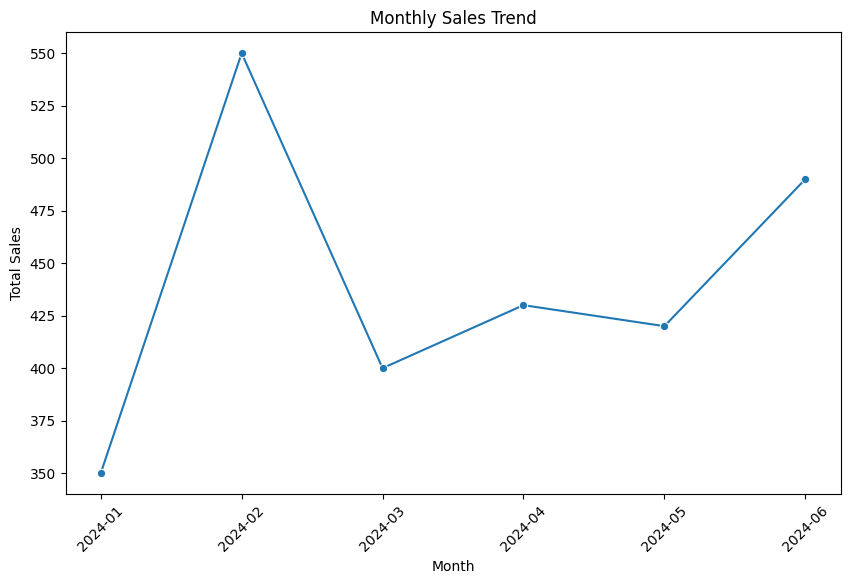

In [7]:
monthly_sales = data.groupby('Month')['Sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', marker='o')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.show()


<ipython-input-8-c1cb2a00bd97>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_sales, x='Product', y='Sales', palette='viridis')


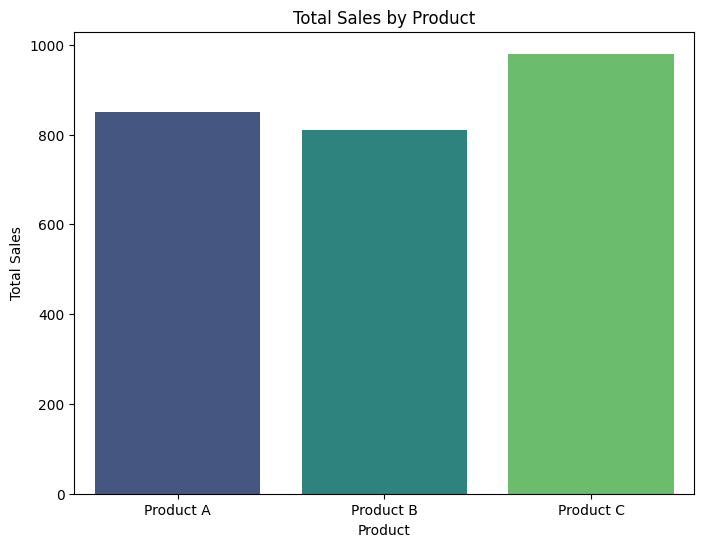

In [8]:
product_sales = data.groupby('Product')['Sales'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=product_sales, x='Product', y='Sales', palette='viridis')
plt.title('Total Sales by Product')
plt.ylabel('Total Sales')
plt.show()


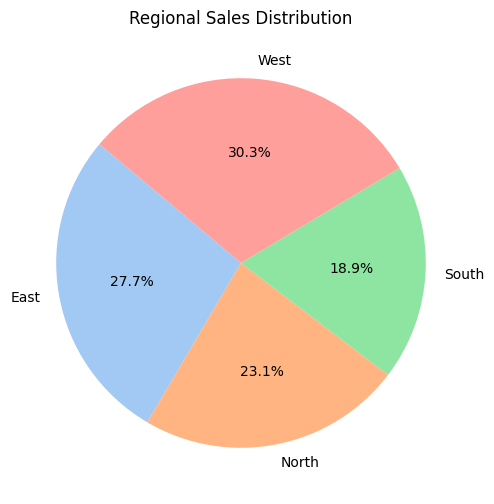

In [9]:
region_sales = data.groupby('Region')['Sales'].sum().reset_index()
plt.figure(figsize=(8, 6))
plt.pie(region_sales['Sales'], labels=region_sales['Region'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Regional Sales Distribution')
plt.show()


In [10]:
import plotly.express as px

fig = px.bar(product_sales, x='Product', y='Sales', title='Total Sales by Product', color='Sales', text='Sales')
fig.show()


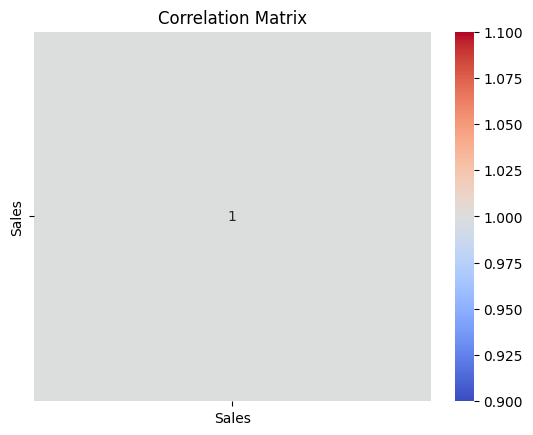

In [12]:
correlation_matrix = data.select_dtypes(include='number').corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



In [13]:
from sklearn.linear_model import LinearRegression
import numpy as np

monthly_sales['Month_Num'] = np.arange(len(monthly_sales))
X = monthly_sales[['Month_Num']]
y = monthly_sales['Sales']

model = LinearRegression()
model.fit(X, y)


future_months = np.arange(len(monthly_sales), len(monthly_sales) + 3).reshape(-1, 1)
future_sales = model.predict(future_months)

print("Predicted Sales for Next 3 Months:", future_sales)


Predicted Sales for Next 3 Months: [474.         483.71428571 493.42857143]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



<ipython-input-14-7a393230f55d>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




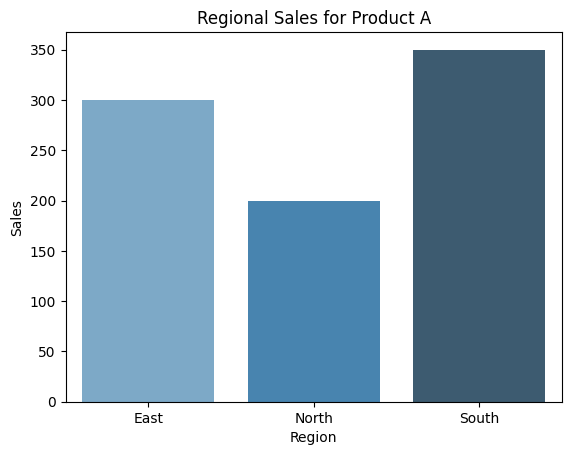

In [14]:
product_a_sales = data[data['Product'] == 'Product A']
region_sales = product_a_sales.groupby('Region')['Sales'].sum().reset_index()

sns.barplot(data=region_sales, x='Region', y='Sales', palette='Blues_d')
plt.title('Regional Sales for Product A')
plt.show()


In [16]:
!pip install streamlit

# Save this as `app.py`
import streamlit as st

st.title("Sales Data Dashboard")
st.line_chart(monthly_sales.set_index('Month')['Sales'])
st.bar_chart(product_sales.set_index('Product')['Sales'])
st.write("Regional Sales Distribution")
st.dataframe(region_sales)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.1 MB/s eta 0:00:00


2024-12-20 17:59:31.672 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-20 17:59:31.754 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-12-20 17:59:31.756 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-20 17:59:32.129 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-20 17:59:32.131 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-20 17:59:32.148 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-20 17:59:32.150 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-20 17:59:32.152 Thread 'MainThread': mi

DeltaGenerator()

2024-12-20 18:01:59.868 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-20 18:01:59.871 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-20 18:01:59.876 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-20 18:01:59.877 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-20 18:01:59.880 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-20 18:01:59.882 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-20 18:01:59.952 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-20 18:01:59.954 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

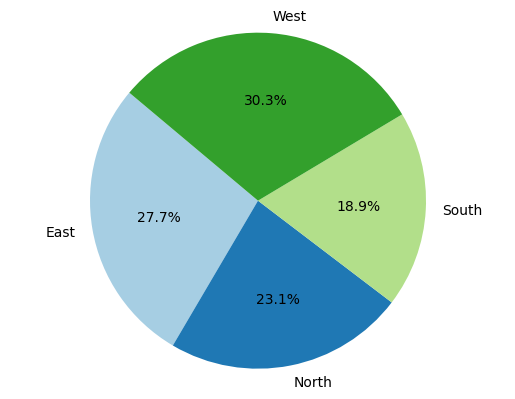

In [19]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Sample Data
data = {
    "Date": [
        "2024-01-15", "2024-01-15", "2024-02-10", "2024-02-10",
        "2024-03-12", "2024-03-12", "2024-04-05", "2024-04-05",
        "2024-05-20", "2024-05-20", "2024-06-15", "2024-06-15"
    ],
    "Product": [
        "Product A", "Product B", "Product A", "Product C",
        "Product B", "Product C", "Product A", "Product B",
        "Product C", "Product A", "Product B", "Product C"
    ],
    "Region": [
        "North", "South", "East", "West",
        "North", "East", "South", "West",
        "North", "South", "East", "West"
    ],
    "Sales": [
        200, 150, 300, 250,
        180, 220, 160, 270,
        230, 190, 210, 280
    ]
}

df = pd.DataFrame(data)

# Streamlit app
st.title("Sales Data Dashboard")
st.write("### Monthly Sales Trend")
monthly_sales = df.groupby('Date')['Sales'].sum().reset_index()
st.line_chart(monthly_sales.set_index('Date')['Sales'])

st.write("### Sales by Product")
product_sales = df.groupby('Product')['Sales'].sum().reset_index()
st.bar_chart(product_sales.set_index('Product')['Sales'])

st.write("### Sales by Region")
region_sales = df.groupby('Region')['Sales'].sum().reset_index()
st.write(region_sales)

# Create and display pie chart using Matplotlib
fig, ax = plt.subplots()
ax.pie(region_sales['Sales'], labels=region_sales['Region'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

st.pyplot(fig)
